
# Ifremer prototype: balast

$
\begin{align}
m_{measured} &= m_{added} + (\rho_w-\rho)V, \\
&= m_{added} + \rho_w V - m, \\
m_{in\;water} &=  (\rho_w-\rho)V
\end{align}
$


$\rho = m/V$


---

$
\begin{align}
\delta m_{in\;water} = 0 &= V \delta \rho_w + \rho_w \delta V - \delta m, \\ 
\end{align}
$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import gsw

import cognac.float as fl

In [2]:
bfile = '/Users/aponte/Current_projects/cognac/campagnes_techno/2019_lopstech/leg2/float/balast.yaml'
#
b = fl.balast()

In [3]:
b.add_balast('ifremer-15/10/2019', mass_in_water=0., mass_in_air=13554., 
             water_temperature=17.4, water_salinity=34.622, 
             piston_displacement=9.*3./4.)
#
b.store(bfile)

Balasting data stored in /Users/aponte/Current_projects/cognac/campagnes_techno/2019_lopstech/leg2/float/balast.yaml


---

In [4]:
b = fl.balast(file=bfile)

File /Users/aponte/Current_projects/cognac/campagnes_techno/2019_lopstech/leg2/float/balast.yaml loaded


In [5]:
b

{ 'ifremer-15/10/2019': { 'CT': 17.40100549537287,
                          'SA': 34.78738585389333,
                          'V': 0.013221626276530922,
                          'comments': 'None',
                          'mass_in_air': 13554.0,
                          'mass_in_water': 0.0,
                          'piston_displacement': 6.75,
                          'rho_water': 1025.1386415345182,
                          'water_salinity': 34.622,
                          'water_temperature': 17.4}}

Piston max volume set from max displacement
WOA water profile at lon=6, lat=40


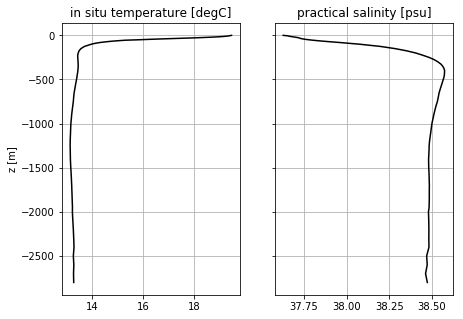

In [6]:
# init float
f = fl.autonomous_float(model='Ifremer')
f.init_piston()

# select a water profile
w = fl.waterp(lon=6.,lat=40.) # Mediterranean sea
print(w)

In [7]:
b.compute_mass_adjustment(f, w)

According to balast ifremer-15/10/2019, you need add 42.0 g


In [8]:
# change of mass in g after 1deg temperature change
dT = 1.
dv = f.alpha*f.m * dT
dv*1e3 # g

0.9460692

In [9]:
print('Float thermal expansion = %1.2e' %(f.alpha))
alpha, beta = w.get_alpha(-1.), w.get_beta(-1.)
print('Water: thermal expansion = %1.2e and haline contraction =% 1.2e' %(alpha, beta))

dT, dS = 1., 1.
for name, _b in b._d.items():
    print('%.1f deg change leads to a float equivalent mass change of %.2f g' %(dT, f.alpha*f.m*dT*1e3))
    print('%.1f deg change leads to an equivalent mass change of %.2f g' %(dT,alpha*f.m*dT*1e3))
    print('%.1f g/kg salinity change leads to an equivalent mass change of %.2f g' %(dS,beta*f.m*dS*1e3))

Float thermal expansion = 6.98e-05
Water: thermal expansion = 2.57e-04 and haline contraction = 7.33e-04
1.0 deg change leads to a float equivalent mass change of 0.95 g
1.0 deg change leads to an equivalent mass change of 3.48 g
1.0 g/kg salinity change leads to an equivalent mass change of 9.93 g


In [10]:
# miscellaneous
f.v*1e6 # volume out in cm3

20.15871648515188

In [11]:
f

Float parameters: 
  L     = 0.83 m      - float length
  r     = 0.07 m      - float radius
  m     = 13.55 kg     - float mass
  V     = 1.32e+04 cm^3   - float volume
  rho_cte = m/V = 9.13e+08 kg.cm^3   - float baseline density
  gamma = 3.78e-06 /dbar  - mechanical compressibility
  alpha = 6.98e-05 /degC  - thermal compressibility
  temp0 = 0.00e+00  degC  - reference temperature
  a = 1.00e+00  (no dimension)  - float added mass
  c0 = 0.00e+00  (no dimension)  - float drag parameter 0
  c1 = 1.00e+00  (no dimension)  - float drag parameter 1
Piston parameters and state: 
  r     = 9.75 mm        - piston radius
  phi   = 0.42 rad       - present angle of rotation
  d     = 67.50 mm        - present piston displacement
  vol   = 20.16 cm^3      - present volume addition
  lead  = 100.00 cm        - screw lead
  d_increment  = 0.00 m        - smallest variation of translation motion for the piston
  vol_error  = 6.40e-08 m^3        - smallest variation of volume possible for the 